In [9]:
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt

In [157]:
def gen_2dnormal(num_points, x_center=0, y_center=0, x_variance=1, y_variance=1):
    return np.random.randn(2, num_points) * np.array([[x_variance, y_variance]]).T + np.array([[x_center, y_center]]).T 

In [166]:
def setup_graph(x_max=10, y_max=10, ticks=5):
    plt.figure(figsize=(20,20))
    plt.xticks(np.arange(-x_max, x_max + 1, ticks))
    plt.yticks(np.arange(-y_max, y_max + 1, ticks))
    plt.grid(True)
    plt.autoscale(False)
    plt.xlim(-x_max, x_max)
    plt.ylim(-y_max, y_max)

def plot_points(points, color='r'):
    plt.scatter(points[0], points[1], color=color)
    

In [47]:
def rotate(points, A):
    points = np.array([points[0], points[1]])
    rotated = A @ points
    return [rotated[0], rotated[1]]

In [135]:
def PCA(points):
    points = np.array([points[0], points[1]])
    cov = points @ points.T / (points.shape[1])
    u, w = np.linalg.eig(cov)
    return u, w, cov

In [139]:
def plot_eig_vectors(eig1, eig2):
    plt.plot([0, eig1[0]], [0, eig1[1]], 'g--')
    plt.plot([0, eig2[0]], [0, eig2[1]], 'r--')

(array([   0.33924042,  106.53092789]), array([[-0.76821973, -0.64018626],
        [ 0.64018626, -0.76821973]]), array([[ 43.86067625,  52.22546635],
        [ 52.22546635,  63.00949206]]))

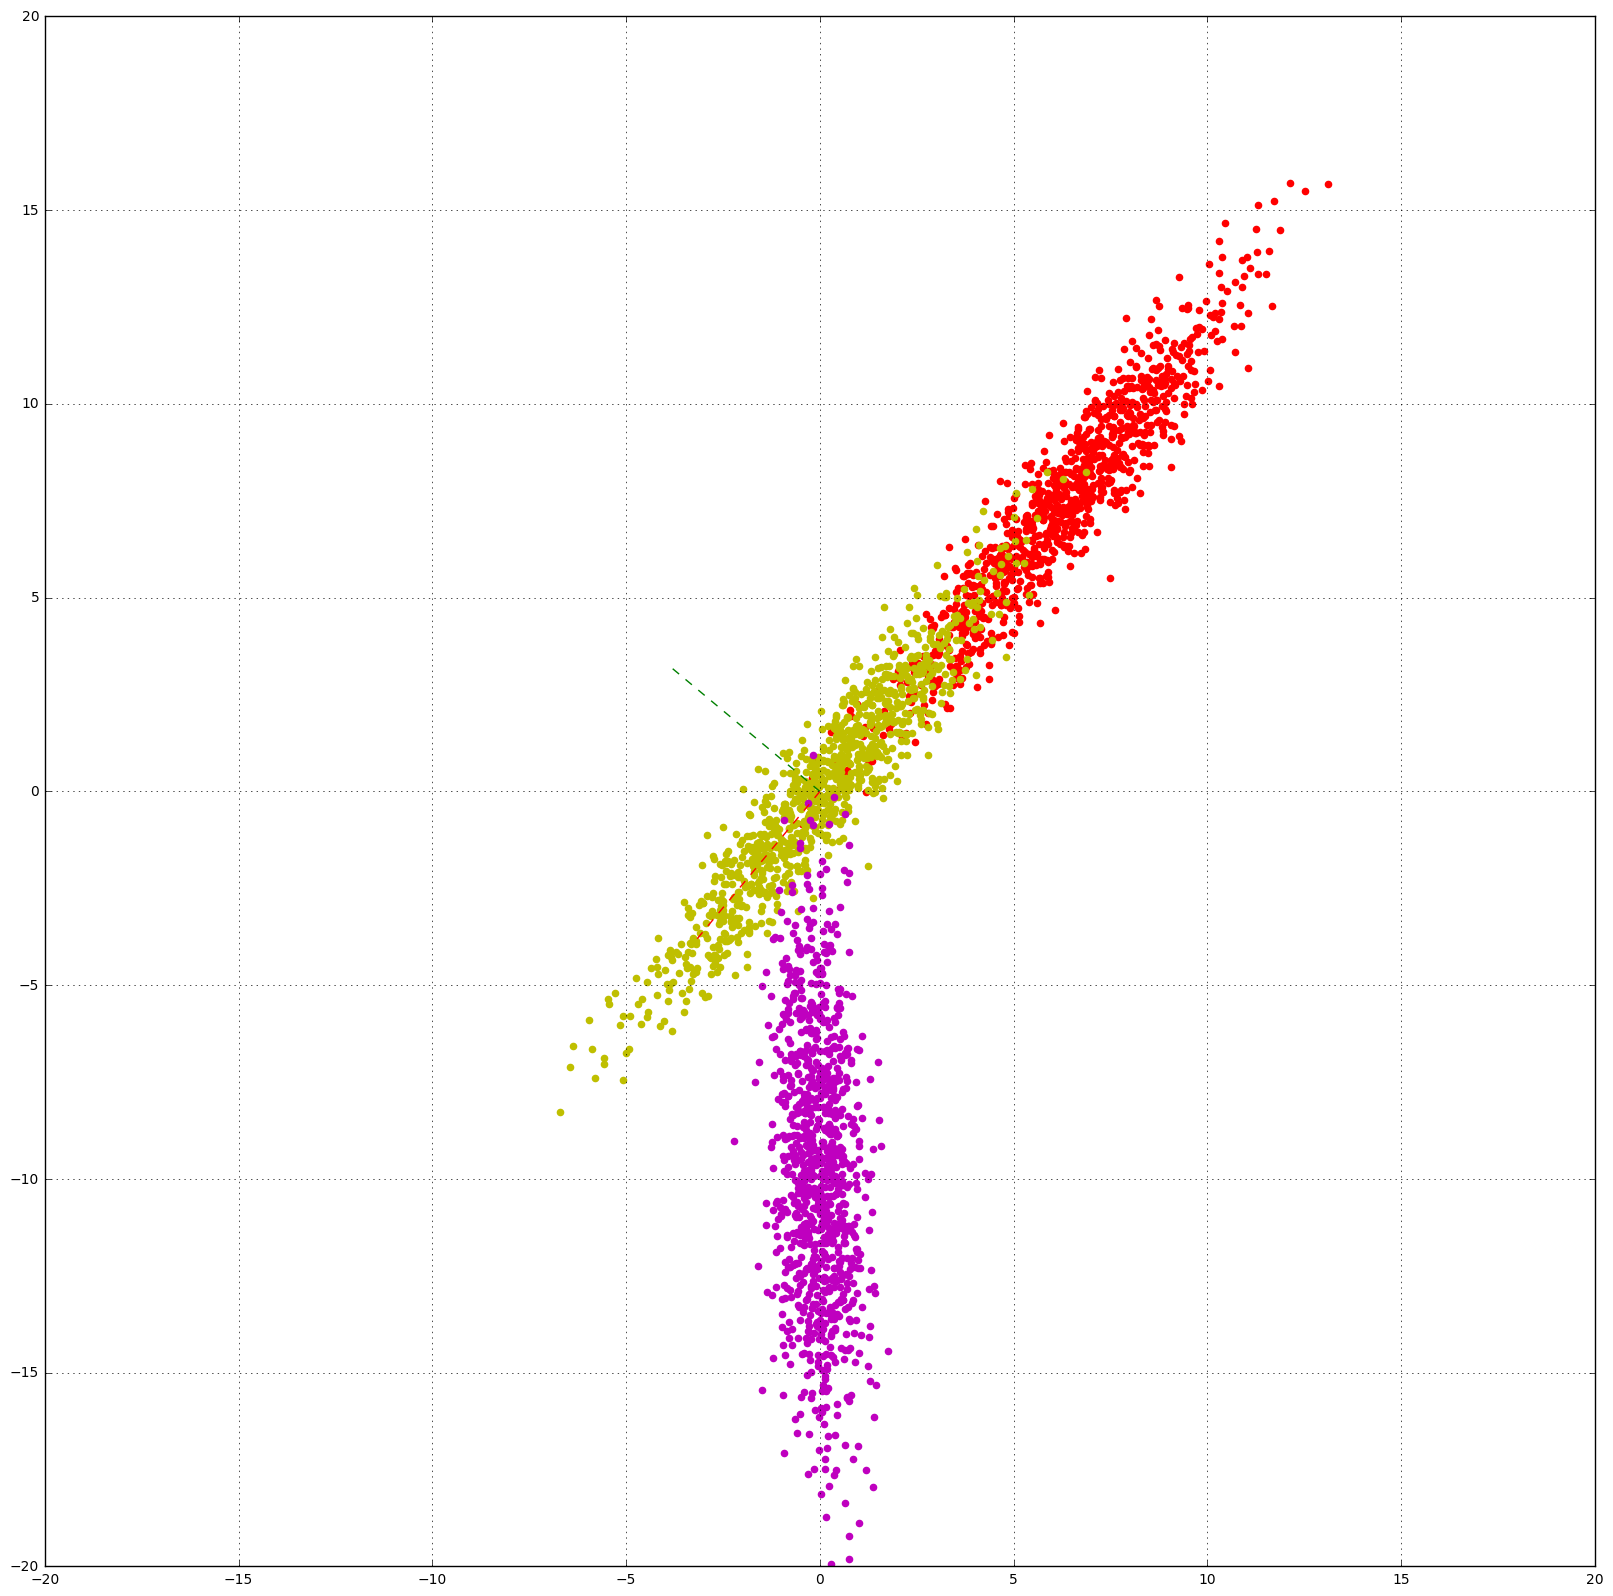

In [167]:
setup_graph(20, 20)

pts = gen_2dnormal(1000, 5, 2.5, 2, 2)
#plot_points(pts, 'g')

A_yinvert = np.array([[1,0],[0,-1]])
pts1 = rotate(pts, A_yinvert)
#plot_points(pts1, 'b')

A_rot = np.array([[1,.5],[1,1]])
pts2 = rotate(pts, A_rot)
plot_points(pts2, 'r')

eig_val, eig_vec, cov = PCA(pts2)
plot_eig_vectors(eig_vec[:,0] * 5, eig_vec[:,1] * 5)

plot_points(pts2 - np.mean(pts2, 1, keepdims=True), 'y')
plot_points(eig_vec.T @ pts2, 'm')

eig_val, eig_vec, cov

In [156]:
np.random.randn(2,3) * np.array([[1,20]]).T

array([[ -2.03430184,   0.04293571,   1.08667402],
       [ 16.56519443,  20.67365074, -22.1633747 ]])

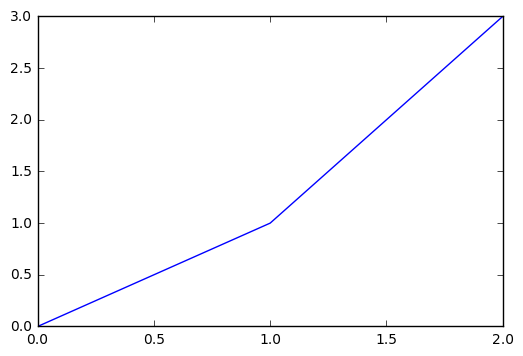

In [138]:
plt.plot([0,1,2], [0,1,3])